# BCB546_Python_Assignment

### To import all the required packages

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import numpy as np

#### 1. This function reads the fasta files and stores description and sequence in a dictonary


In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} #creates a dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"):# parses fasta files for each record 
        description = record.description.split() # splits the words from the description
        species_name = description[1] + " " + description[2] # assigns the second and third element of the list as species name  
        sequence_data_dict[species_name] = record.seq # adds the sequence and species name to the dictionary
    return(sequence_data_dict) # gives the dictionary as the result 

In [3]:
seq = get_sequences_from_file("bears_cytb.fasta ")
seq

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA'),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA'),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA'),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA'),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA'),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA'),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA')}

#### 2. This section is to create a function that would translate a DNA sequence into amino acid chain. 

In [14]:
def translate_CDS_function(Nucleotide_sequence):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #Imports genetic code for vertebrate mitochondria
    amino_acid = '' # assigning empty variable for amino_acid sequence
    for i in range (0, len(Nucleotide_sequence), 3): # go through the entire length of nucleotide with increment of 3
        codon = Nucleotide_sequence[i: i+3]
        if codon not in mito_table.stop_codons and len(codon) ==3: 
            amino_acid += mito_table.forward_table[codon]
    return(amino_acid)

In [15]:
example_cds = "ATGACCAACATC"

In [16]:
translate_CDS_function(example_cds)

'MTNI'

#### 3. Alternative method for translation using biopython

In [17]:
def translate_cds_function2(Nucleotides_sequence):
    from Bio.Seq import Seq # imports seq from Bio.Seq package
    sequence = Seq(Nucleotides_sequence) #Saves the supplied sequence as a Seq object
    amino_acid_seq = sequence.translate(table=2, to_stop=True) # translates the sequence based on the genetic code 2 with an option to stop when a stop codon is encountered
    return(str(amino_acid_seq))
    

In [18]:
example_cds = "ATGACCAACATC"

In [19]:
translate_cds_function2(example_cds)

'MTNI'

#### 4. This is to calculate molecular weight of the amino acid chain

In [22]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def molecular_weight_of(amino_acid_seq):
    amino_acid_seq_Analysed = ProteinAnalysis(amino_acid_seq) #analyses the amino acid sequence supplied
    molecular_weight = amino_acid_seq_Analysed.molecular_weight() #uses molecular weight attribute to calculate weight
    return(molecular_weight)

In [23]:
molecular_weight_of("MTNI")

477.5754

#### 5. This is to calculate GC content of the DNA sequence

In [24]:
from Bio.SeqUtils import GC # imports the GC function

def GC_content_function(DNA):
    GC_content = GC(DNA) # calculates the GC content
    return(GC_content)

In [26]:
GC_content_function("ATGACCAACATC")

41.666666666666664

### The following extracts the sequences from a given fasta file and loads the csv file provided as a pandas dataframe

In [64]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass1.csv") # includes only data for body mass, loads the csv as a dataframe 
species_list = list(bears_df.species) #makes a list of species name

#### 6. Adding two new columns; GC content and molecular weight to the files and assign NaN as the assigned values

In [65]:
bears_df['molecular_weight'] = float("NaN")
bears_df['gc_content'] = float("NaN")

#### 7. 'For loop' for calculating molecualr weight and GC content and adding it to the file

In [66]:
for i in cytb_seqs: #iterates through i value in the dictionary
    DNA_seq = str(cytb_seqs[i]) # imports sequence data in the dictionary according to the i value and savies them as string
    aa_seq = translate_CDS_function(DNA_seq) #assigns a translate function to get aa seq
    bears_df.loc[bears_df.species == i,'Molecular_Weight'] = molecular_weight_of(aa_seq) #saves the molecular weight on Molecular_Weight column of respective species
    bears_df.loc[bears_df.species == i,'GC_content'] = GC_content_function(DNA_seq) #saves the GC content on GC_content column of respective species

In [67]:
bears_df

,species,mass,molecular_weight,gc_content,Molecular_Weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN,42458.7992,43.771930
1,Ursus arctos,203.500,NaN,NaN,42414.7435,43.771930
2,Ursus thibetanus,99.714,NaN,NaN,42306.6735,45.614035
3,Melursus ursinus,100.030,NaN,NaN,42551.9900,45.175439
4,Ursus americanus,110.560,NaN,NaN,42427.7439,43.947368
5,Helarctos malayanus,47.020,NaN,NaN,42560.8910,44.298246
6,Ailuropoda melanoleuca,118.200,NaN,NaN,42702.1845,40.789474
7,Tremarctos ornatus,140.700,NaN,NaN,42384.8266,44.385965
8,Ursus maritimus,425.100,NaN,NaN,42454.7873,44.298246


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 8. To Plot a bar-chart of the mass with the x-axes labeled with species names

In [69]:
%matplotlib inline

In [70]:
plot_dims = (25, 9) # specifies the dimensions of the graph

[Text(0, 0.5, 'mass'), Text(0.5, 0, 'species')]

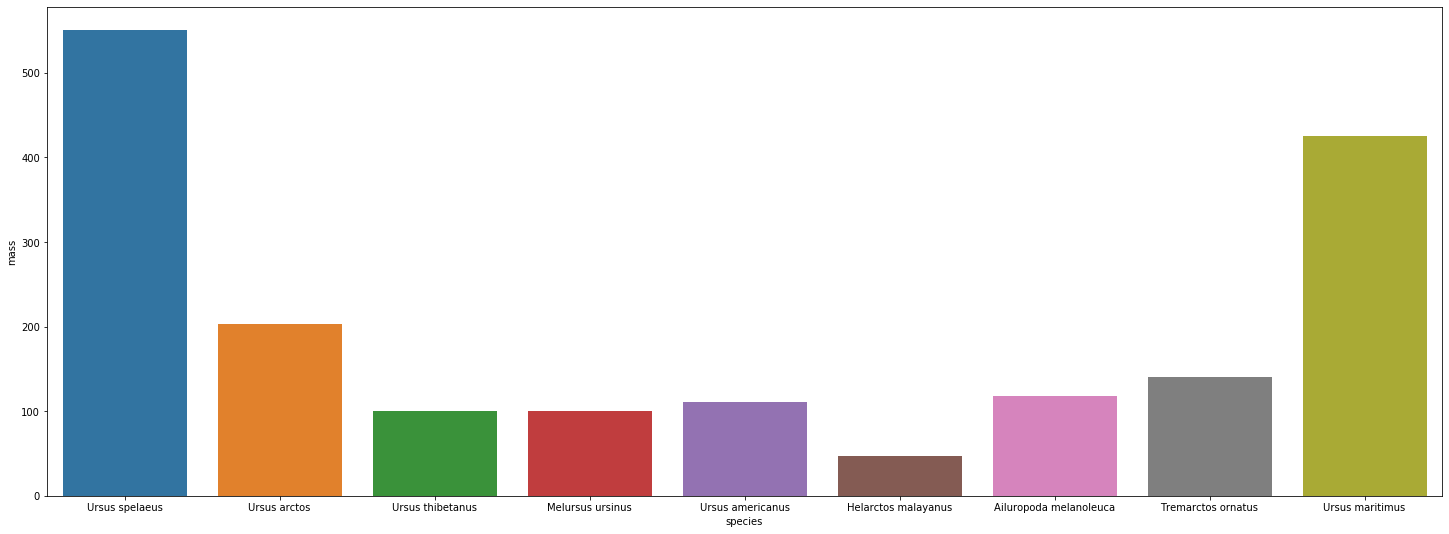

In [71]:
fig, ax = plt.subplots(figsize = plot_dims) # fixes the previously specified  dimension to the graph
sns.barplot('species','mass', data = bears_df) #creates a bar-chart for speceis and mass
ax.set(xlabel = 'species', ylabel = 'mass') # sets labels for the x and the y axes

1. Ursus spelaeus is the largest bear among given bear species. 
2. They are extinct species known as cave bear. They were predominantly vegeterian. 
Pacher, M., &amp; Stuart, A. (2008, November 26). Extinction chronology and palaeobiology of the cave bear (ursus spelaeus). Retrieved May 04, 2021, from https://onlinelibrary.wiley.com/doi/full/10.1111/j.1502-3885.2008.00071.x?casa_token=Q-4Yh67T1dIAAAAA%3AfMyAndDneYmWLq4kutqFgJ0XR-qQNQpU9WSofzdT_3xBQNss6xY4mTOlTf5nr43xjIa1RAOLWq6WqQ

#### 9. To plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

Text(-6.67499999999999, 0.5, 'Molecular Weight')

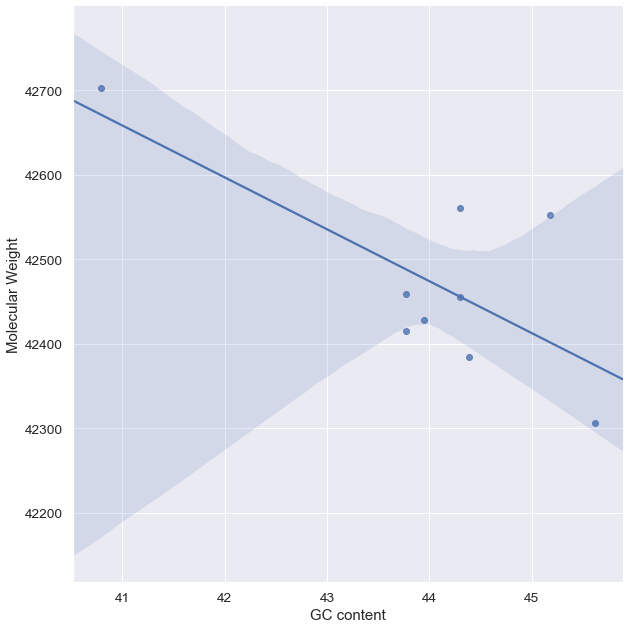

In [72]:
sns.set(font_scale=1.25) #sets the fontsize for the visualization
fig, 
sns.lmplot(data = bears_df, x = 'GC_content', # Plots visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)
    y = 'Molecular_Weight',
    height = 9,    aspect =1 ) # dimensions

plt.xlabel('GC content') #sets the labels
plt.ylabel('Molecular Weight')

##### 10. To Save the new DataFrame to a file called "bears_mass_cytb.csv" 

In [73]:
bears_df.to_csv("bears_mass_cytb.csv", index = False)

##### 11. To plot the GC content as the function of mass with Species in varying colors. 

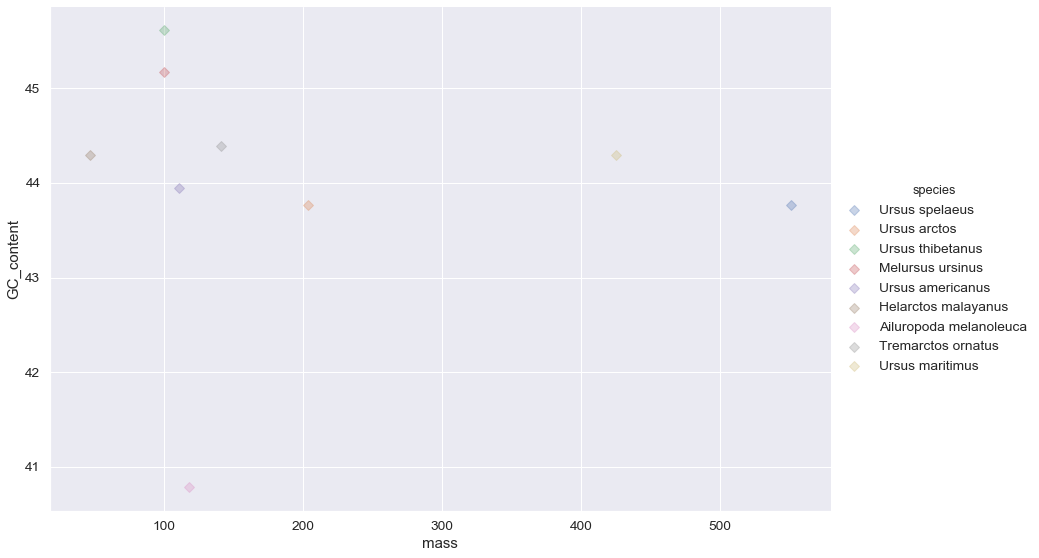

In [81]:
sns.lmplot(x="mass", y="GC_content", data=bears_df, 
           fit_reg=False, height=8, aspect=1.5, scatter_kws={'alpha':0.3,"s": 50}, 
           hue='species', markers='D')